### Price analysis of cars

The goal of this exploratory data analysis was to understand the impact of all the different independent variables in the data on the price of cars. Here are the different stages I went through during this EDA:
1. Understanding the data.
2. Doing data quality checks to ensure clean data. Fixing the data based on quality issues found.
3. Analyzing the correlation and relationship between different continuous variables (including the dependent variable price) in the data.
4. Analyzing the relationship between the price of cars and categorical data.


#### Analysis

#### Importing all required libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [3]:
cars = pd.read_csv('CarPrice_Assignment.csv')

#### Understanding the dataset

In this section I wanted to look into the nature of dataset and understand the distribution within each column (categorical and continuous)

In [4]:
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

describe() function helps in understanding the distribution of **continuous variables**.

In [6]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


For **catgorical variables** I used the aggregate function to look at the distribution of data across all categories for each variable.

In [123]:
for col in cat_columns:
    print(cars.groupby(col).agg({'price': ['count', 'min', 'max', 'mean', 'median']}))

          price                                         
          count      min      max          mean   median
symboling                                               
-1           22   8921.0  34184.0  17330.681818  16132.5
-2            3  12940.0  18420.0  15781.666667  15985.0
0            67   6575.0  41315.0  14366.965179  11259.0
1            54   5195.0  45400.0  10037.907407   7554.0
2            32   5118.0  18620.0  10109.281250   8995.0
3            27   8499.0  37028.0  17221.296296  14869.0
            price                                          
            count      min      max          mean    median
CarBrand                                                   
Nissan          1   5499.0   5499.0   5499.000000   5499.00
alfa-romero     3  13495.0  16500.0  15498.333333  16500.00
audi            7  13950.0  23875.0  17859.166714  17710.00
bmw             8  16430.0  41315.0  26118.750000  22835.00
buick           8  25552.0  45400.0  33647.000000  32892.00
chevrol

#### Findings from looking at the nature and distribution of the data in various columns

1. No missing values in the data so the dataset doesn't require any null value treatments
2. Symboling appears to have fixed integer values so lets look at the unique values in this column to understand if this column is supposed to have continuous or categorical values. 

In [7]:
cars.symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

This column seems categorical. So our next step would be to convert this column to a string for interpretation. 

In [8]:
cars.symboling = cars.symboling.apply(str)

3. The column car name has a higer level of information to it, car brand + car model within the brand. In the real world a) car brands sometimes affect price points b) car brands are known to have a wide range of models to suit the population's needs. So I have decided to split CarName into CarBrand and CarModel

In [9]:
# Splitting by the first space
cars[['CarBrand','CarModel']] = cars.CarName.str.split(' ', n=1, expand=True)
# Dropping CarName
cars.drop(labels=['CarName'], axis=1, inplace=True)

I rearranged the columns in the dataset to restore the original positioning of columns with 'price' at the end.

In [11]:
cars.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'CarBrand',
       'CarModel'],
      dtype='object')

In [12]:
# Re-arranging the order of columns in the dataset
columns = ['car_ID', 'symboling', 'CarBrand',
       'CarModel', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

cars = cars[columns]

In [13]:
cars.head()

,car_ID,symboling,CarBrand,CarModel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


4. There are data quality issues in the Car Brand variable that need to be fixed.

In [135]:
cars.loc[cars['CarBrand'] == 'porcshce', 'CarBrand'] = 'porsche'
cars.loc[cars['CarBrand'] == 'toyouta', 'CarBrand'] = 'toyota'
cars.loc[cars['CarBrand'] == 'maxda', 'CarBrand'] = 'mazda'
cars.loc[(cars['CarBrand'] == 'vokswagen') | (cars['CarBrand'] == 'vw'), 'CarBrand'] = 'volkswagen'
(cars.groupby('CarBrand').agg({'price': ['count', 'min', 'max', 'mean', 'median']}))

price                                         
            count      min      max          mean   median
CarBrand                                                  
Nissan          1   5499.0   5499.0   5499.000000   5499.0
alfa-romero     3  13495.0  16500.0  15498.333333  16500.0
audi            7  13950.0  23875.0  17859.166714  17710.0
bmw             8  16430.0  41315.0  26118.750000  22835.0
buick           8  25552.0  45400.0  33647.000000  32892.0
chevrolet       3   5151.0   6575.0   6007.000000   6295.0
dodge           9   5572.0  12964.0   7875.444444   7609.0
honda          13   5399.0  12945.0   8184.692308   7295.0
isuzu           4   6785.0  11048.0   8916.500000   8916.5
jaguar          3  32250.0  36000.0  34600.000000  35550.0
mazda          17   5195.0  18344.0  10652.882353  10595.0
mercury         1  16503.0  16503.0  16503.000000  16503.0
mitsubishi     13   5389.0  14869.0   9239.769231   8499.0
nissan         17   6649.0  19699.0  10704.882353   8249.0
peugeot        11  11900.0  18150.0  15489.090909  16630.0
plymouth        7   5572.0  12764.0   7963.428571   7609.0
porsche         5  22018.0  37028.0  31400.500000  32528.0
renault         2   9295.0   9895.0   9595.000000   9595.0
saab            6  11850.0  18620.0  15223.333333  15275.0
subaru         12   5118.0  11694.0   8541.250000   7894.0
toyota         32   5348.0  17669.0   9885.812500   9103.0
volkswagen     12   7775.0  13845.0  10077.500000   9737.5
volvo          11  12940.0  22625.0  18063.181818  18420.0

5. Figuring out if same models within a brand have the same price. Based on the below observation turns out that is not always the case.

In [136]:
cars.loc[:, ['CarBrand','CarModel', 'price']].drop_duplicates().values

array([['alfa-romero', 'giulia', 13495.0],
       ['alfa-romero', 'stelvio', 16500.0],
       ['alfa-romero', 'Quadrifoglio', 16500.0],
       ['audi', '100 ls', 13950.0],
       ['audi', '100ls', 17450.0],
       ['audi', 'fox', 15250.0],
       ['audi', '100ls', 17710.0],
       ['audi', '5000', 18920.0],
       ['audi', '4000', 23875.0],
       ['audi', '5000s (diesel)', 17859.167],
       ['bmw', '320i', 16430.0],
       ['bmw', '320i', 16925.0],
       ['bmw', 'x1', 20970.0],
       ['bmw', 'x3', 21105.0],
       ['bmw', 'z4', 24565.0],
       ['bmw', 'x4', 30760.0],
       ['bmw', 'x5', 41315.0],
       ['bmw', 'x3', 36880.0],
       ['chevrolet', 'impala', 5151.0],
       ['chevrolet', 'monte carlo', 6295.0],
       ['chevrolet', 'vega 2300', 6575.0],
       ['dodge', 'rampage', 5572.0],
       ['dodge', 'challenger se', 6377.0],
       ['dodge', 'd200', 7957.0],
       ['dodge', 'monaco (sw)', 6229.0],
       ['dodge', 'colt hardtop', 6692.0],
       ['dodge', 'colt (sw)', 7609

#### Visualizations to showcase interesting relationships in the data

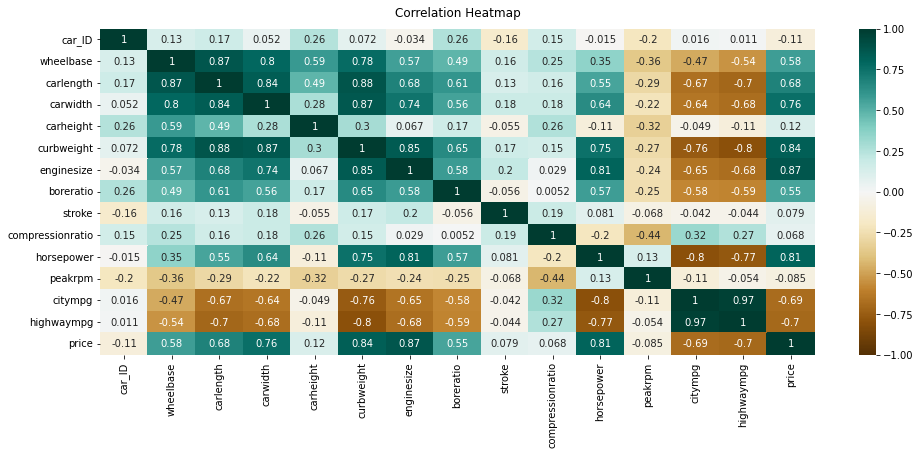

In [144]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(cars.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

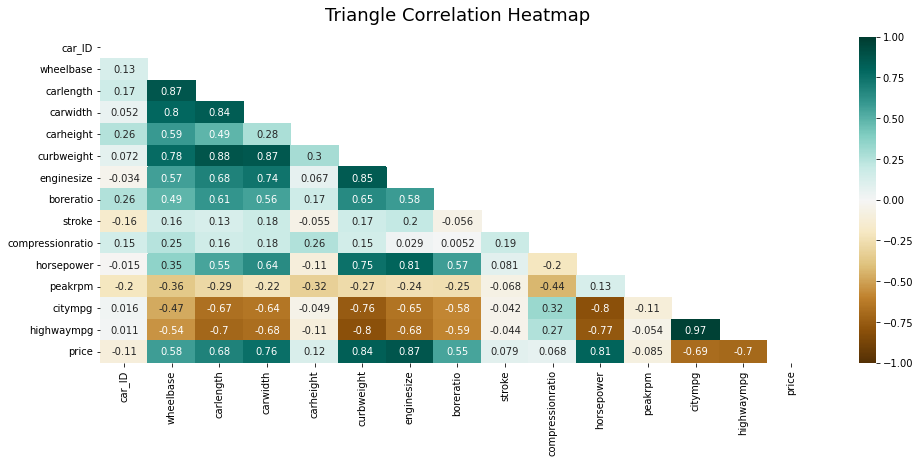

In [143]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(cars.corr(), dtype=bool))
heatmap = sns.heatmap(cars.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

#### Deep-dive on correlation between continuous variables

I have considered the following range to represent medium high or high correlation between variables. 
High correlation - (0.7 to 0.9) or (-0.7 to -0.9)
Very High correlation - (0.9 to 1) or (-0.9 to -1)

1. Citympg & Highwaympg are highly correlated which wasn't surprising as they both represent mileage. 
2. Car width, curb weight and engine size are all highly positively correlated to each other. These three variables could be interdependent because they all are related to car size.
3. However, Citympg & Highwaympg show high negative correlation to curb weight.
4. Horse power is highly positively correlated to enginesize and engine size. It is also highly negatively correlated to mileage variables. 


##### Correlation of independent continuous variables and dependdent variable (price)
1. Price is highly positively correlated to engine size (87%), curb weight (84%), car width (76%) and horse power (81%). -> Hypotheses: a) Bigger cars have higher prices. b) powerful cars are more expensive.
2. Price shows high negative correlation to mileage variables like citympg & highwaympg. Hypothesis: Cars with lower mileage have high price. Could have something to do with the negative correlation between mileage and curbweight.

#### Analyzing correlation outcomes for Price

Below I am trying to understand the relationship between mileage variables (citympg & highwaympg), curbweight and price

First of all I want to see pair plots between all the highly positively and negatively correlated independent variable pairs that affect the price of cars.

<AxesSubplot:xlabel='horsepower', ylabel='price'>

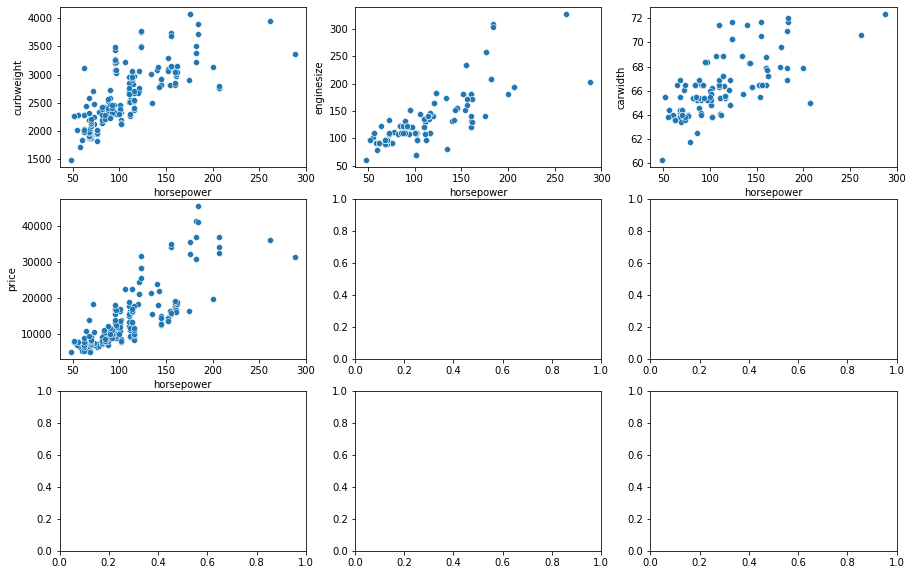

In [183]:
 ['car_ID', 'symboling', 'CarBrand',
       'CarModel', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))


sns.scatterplot(data=cars, y="curbweight", x="horsepower", ax=axs[0,0])
sns.scatterplot(data=cars, y="enginesize", x="horsepower", ax=axs[0,1])
sns.scatterplot(data=cars, y="carwidth", x="horsepower", ax=axs[0,2])
sns.scatterplot(data=cars, y="price", x="horsepower", ax=axs[1,0])

<AxesSubplot:xlabel='curbweight', ylabel='price'>

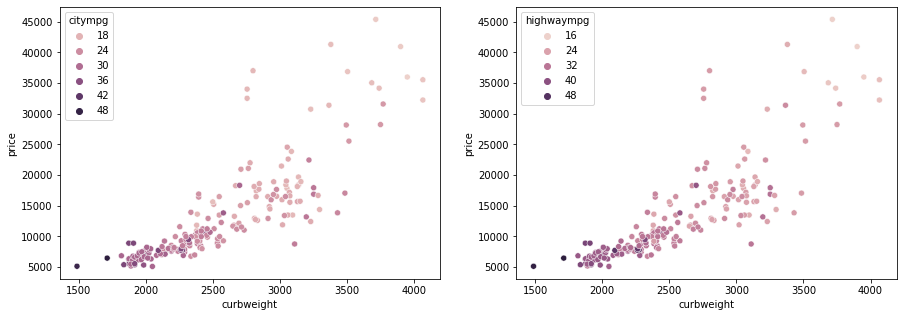

In [171]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.scatterplot(data=cars, x="curbweight", y="price", hue="citympg", ax=axs[0])
sns.scatterplot(data=cars, x="curbweight", y="price", hue="highwaympg", ax=axs[1])

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

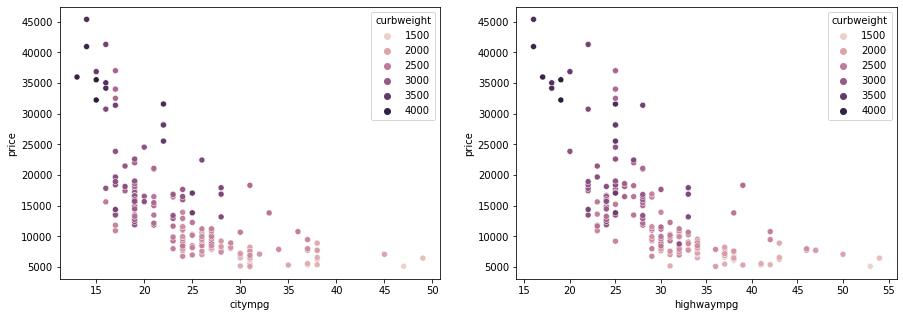

In [173]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.scatterplot(data=cars, x="citympg", y="price", hue="curbweight", ax=axs[0])
sns.scatterplot(data=cars, x="highwaympg", y="price", hue="curbweight", ax=axs[1])

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

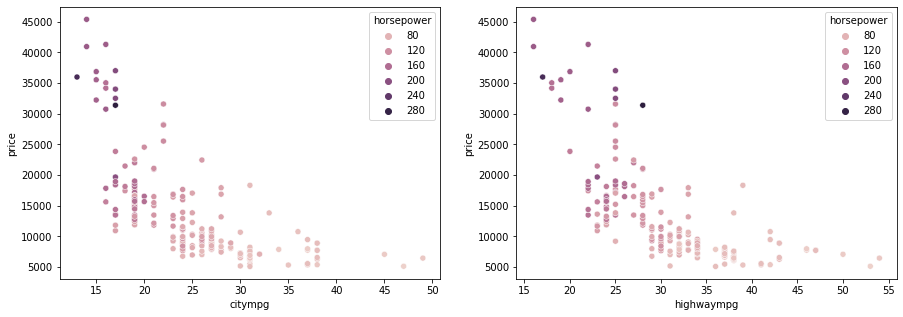

In [174]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.scatterplot(data=cars, x="citympg", y="price", hue="horsepower", ax=axs[0])
sns.scatterplot(data=cars, x="highwaympg", y="price", hue="horsepower", ax=axs[1])

<AxesSubplot:xlabel='horsepower', ylabel='price'>

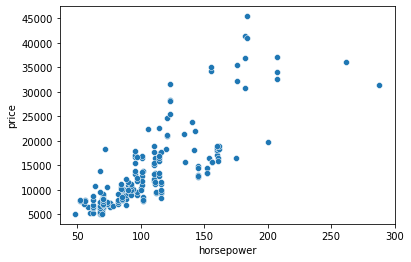

In [175]:
sns.scatterplot(data=cars, y="price", x="horsepower")

#### Relationship between categorical independent variables and the price of cars

Text(0, 0.5, 'Price in $')

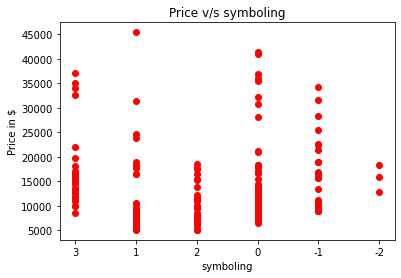

In [15]:
column = 'symboling'

plt.scatter(cars[column], cars.price, color = 'red')
plt.title('Price v/s {0}'.format(column))
plt.xlabel('{}'.format(column))
plt.ylabel('Price in $')

In [103]:
cat_columns = ['symboling', 'CarBrand', 'fueltype', 'aspiration', 'doornumber', \
               'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

In [17]:
matrix_cols = cat_columns.copy()
matrix_cols.append('price')

In [18]:
matrix_cols

['symboling',
 'CarBrand',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'price']

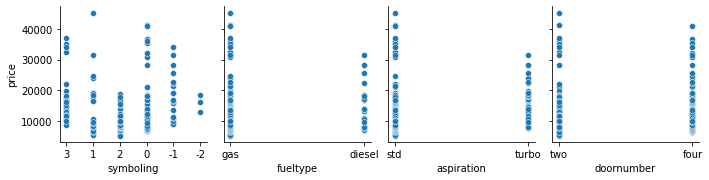

In [43]:
pp = sns.pairplot(data=cars,
                  y_vars=['price'],
                  x_vars=['symboling', 'fueltype', 'aspiration', 'doornumber'])

Text(0.5, 1.0, 'Prices of cars by brand')

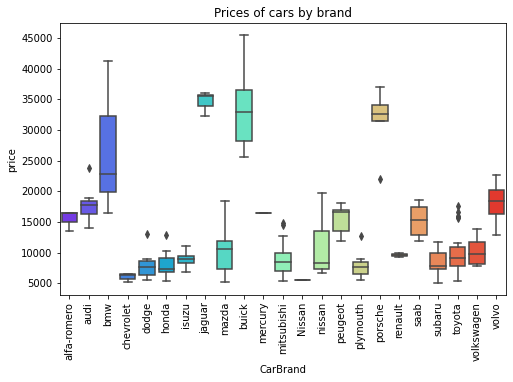

In [137]:
plt.figure(figsize=(8,5))
sns.boxplot(x='CarBrand',y='price',data=cars, palette='rainbow')
plt.xticks(rotation=90) # Rotating labels on X-axis by 90 degrees
plt.title("Prices of cars by brand")

Text(0.5, 1.0, 'Prices of cars by Fuel System')

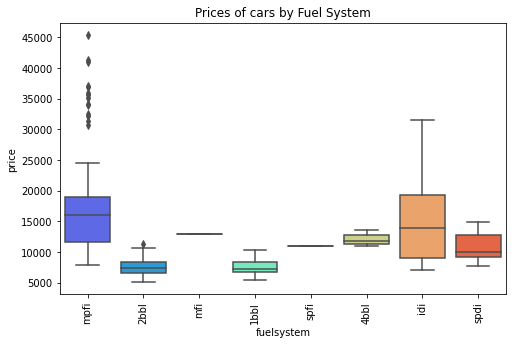

In [91]:
plt.figure(figsize=(8,5))
sns.boxplot(x='fuelsystem',y='price',data=cars, palette='rainbow')
plt.xticks(rotation=90) # Rotating labels on X-axis by 90 degrees
plt.title("Prices of cars by Fuel System")

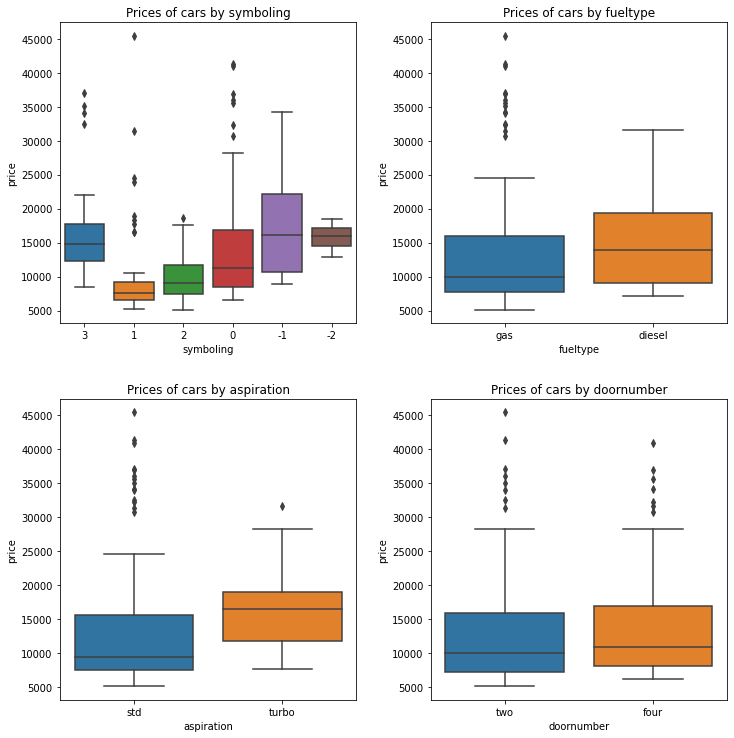

In [95]:
total_rows = 2
total_cols = 2
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(10, 10))
fig.tight_layout() 
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.25)


# plt.xticks(rotation=90) # Rotating labels on X-axis by 90 degrees
i = j = 0
for variable in ['symboling', 'fueltype', 'aspiration', 'doornumber']:
    axs[i,j].set_title("Prices of cars by {}".format(variable))
    g = sns.boxplot(x=variable, y="price", data=cars.query("price>0"), ax=axs[i][j])
#     g.set(yscale="log")
    j += 1
    if j >= total_cols:
        i += 1; j = 0

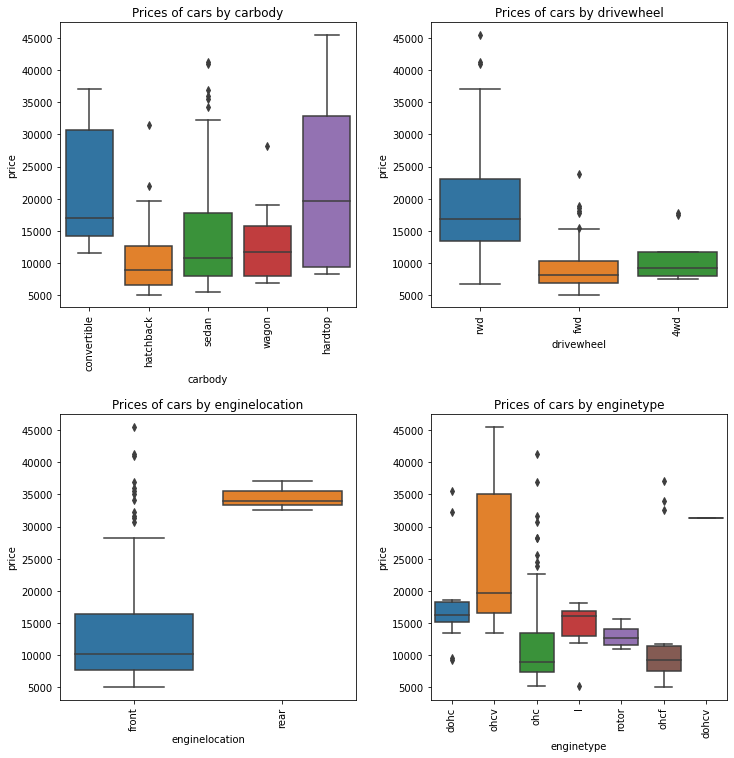

In [108]:
total_rows = 2
total_cols = 2
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(10, 10))
fig.tight_layout() 
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.375)


# plt.xticks(rotation=90) # Rotating labels on X-axis by 90 degrees
i = j = 0
for variable in ['carbody', 'drivewheel', 'enginelocation', 'enginetype']:
    axs[i,j].set_title("Prices of cars by {}".format(variable))
    subplot = sns.boxplot(x=variable, y="price", data=cars.query("price>0"), ax=axs[i][j])
#     To make labels rotated
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
    j += 1
    if j >= total_cols:
        i += 1; j = 0

Text(0.5, 1.0, 'Prices of cars by Fuel System')

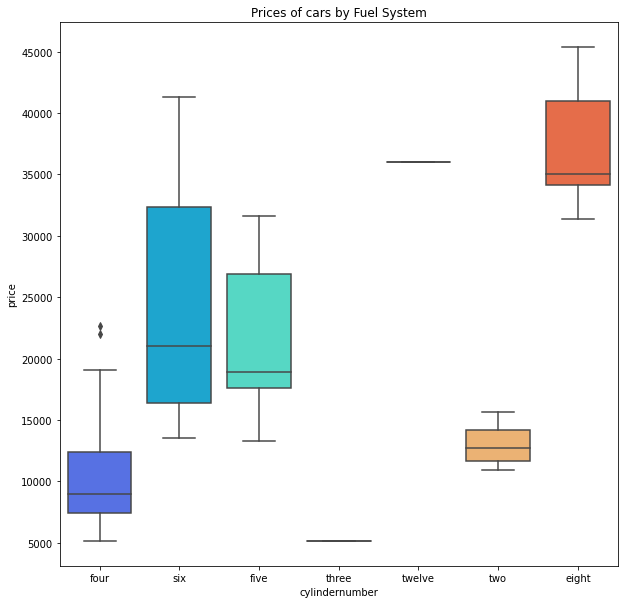

In [109]:
plt.figure(figsize=(10,10))
sns.boxplot(x='cylindernumber',y='price',data=cars, palette='rainbow')
# plt.xticks(rotation=90) # Rotating labels on X-axis by 90 degrees
plt.title("Prices of cars by Fuel System")

#### Observations from the EDA

1. Price is highly correlated to curb weight & engine size (These two independent variables are ocrrelated to each other as well so if we were modeling we might need to look into keeping one of these)
2. Some brands like Porche, Buick have a higher median price (over 30K) than all other brands in the sample 